In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import same_seed, create_Z, sample_mask
from src.convex import SDP

In [5]:
def generate_data(n, m, r, mu, PSD=False, data_points=20, ensemble=10):
    # Produce Error Data
    SE = []
    probs = np.linspace(0.1, 1, data_points)
    for p in probs:
        error = 0
        for i in range(ensemble):
            Z, _ = create_Z(n, m, r, mu, PSD)
            mask = sample_mask(n, m, p)
            _, _, _, _error = SDP(Z, mask)
            error += _error
        SE.append(error / ensemble)
    return probs, SE

In [3]:
def plot_error(probs, SE):
    # bound = mu * r * (np.log10(n))**2 / n
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)
    
    ax.plot(probs, SE, marker='o', linestyle='-', color='blue', label='empirical data')
    # ax.axvline(x = bound, color = 'r', label = 'theoretical bound')
    
    ax.set_xlabel("Sample Probability p", fontsize=30), 
    ax.set_ylabel(r"$\|X^* - Z\|^2_F$", fontsize=30)
    ax.set_title(f"Impact of p on Solution Exactness", fontsize=25, fontname='Comic Sans MS')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_yscale('log')
    ax.grid()

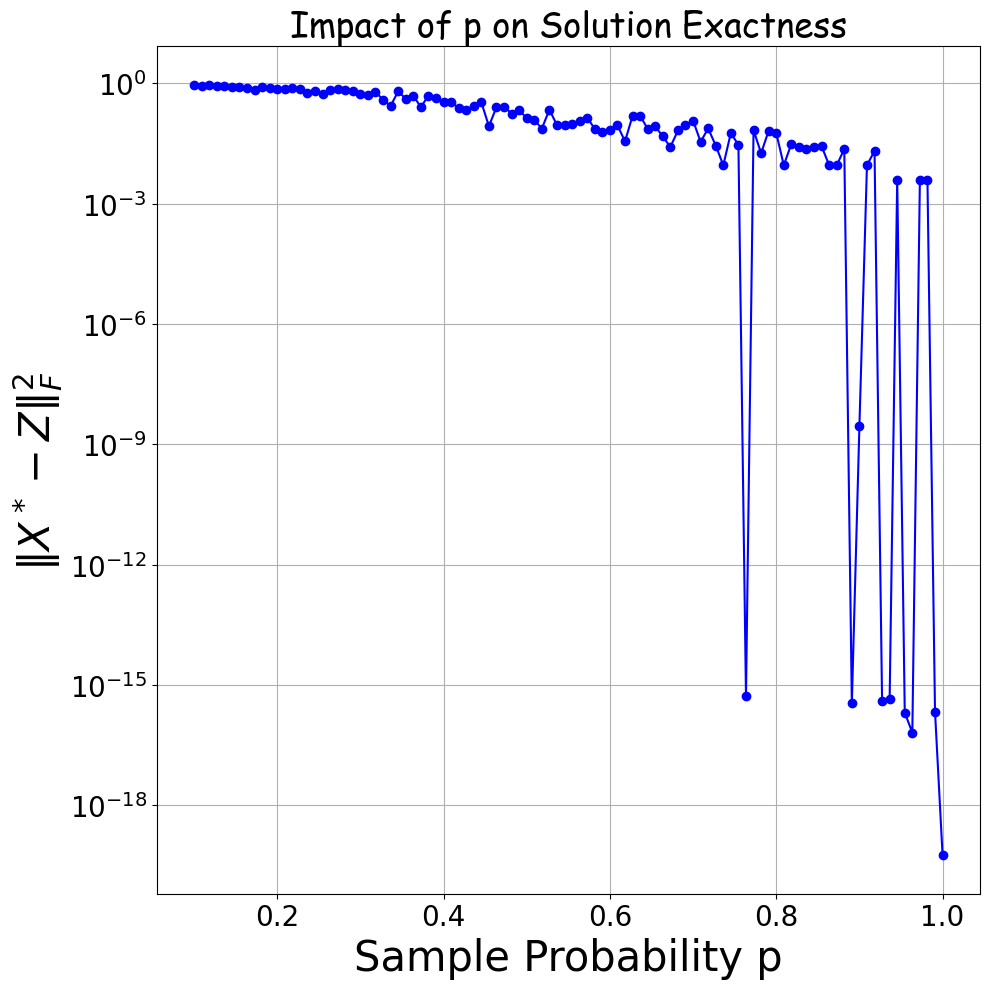

In [6]:
n   = 5
m   = 5
r   = 1
mu  = 3
PSD = True
data_points = 100
ensemble = 10

same_seed(0)
probs, SE = generate_data(n, m, r, mu, PSD, data_points)
plot_error(probs, SE)